In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
from common_import import *

In [2]:
data_type_list = ['source_list', 'cam_param',
                  'cam_3d', 'img_2d', 'world_3d',
                  'img_3d', 'scale_factor', 'img_25d',
                  'cam_3d_canonical_same_z', 'img_2d_canonical_same_z',
                  ]
overwrite_list = []
dataset_name = 'h36m'
data_aug = default_data_aug.copy()
data = load_data_dict(dataset_name, data_type_list, overwrite_list, verbose=True, data_aug=data_aug)

[overwrite: False] ==> Loading H36M source_list...
[overwrite: False] ==> Loading H36M cam_param...
[overwrite: False] ==> Loading H36M cam_3d...
[overwrite: False] ==> Loading H36M img_2d...
[overwrite: False] ==> Loading H36M world_3d...
[overwrite: False] ==> Loading H36M img_3d...
[overwrite: False] ==> Loading H36M scale_factor...
[overwrite: False] ==> Loading H36M img_25d...
[overwrite: False] ==> Loading H36M cam_3d_canonical_same_z...
[overwrite: False] ==> Loading H36M img_2d_canonical_same_z...


In [4]:
source = 'S1_55011271_Walking'
subject, cam_id, action = split_source_name(source, dataset_name)
print(subject, cam_id, action)
cam_3d = data['cam_3d'][subject][action][cam_id].copy()
cam_3d_hat = cam_3d.copy() - cam_3d[:, 0:1]
cam_3d_canonical = data['cam_3d_canonical_same_z'][subject][action][cam_id].copy()
img_2d = data['img_2d'][subject][action][cam_id].copy()
img_2d_canonical = data['img_2d_canonical_same_z'][subject][action][cam_id].copy()
cam_param = data['cam_param'][subject][action][cam_id].copy()
W, H, intrinsic = cam_param['W'], cam_param['H'], cam_param['intrinsic']
img_2d_norm = normalize_input(img_2d, W, H)
img_2d_centered = img_2d_norm.copy() - img_2d_norm[:, 0:1]
img_2d_canonical_norm = normalize_input(img_2d_canonical, W, H)

S1 55011271 Walking


# fig. 1

### fig. 1 (a) original 2D / fig. 2 (b)

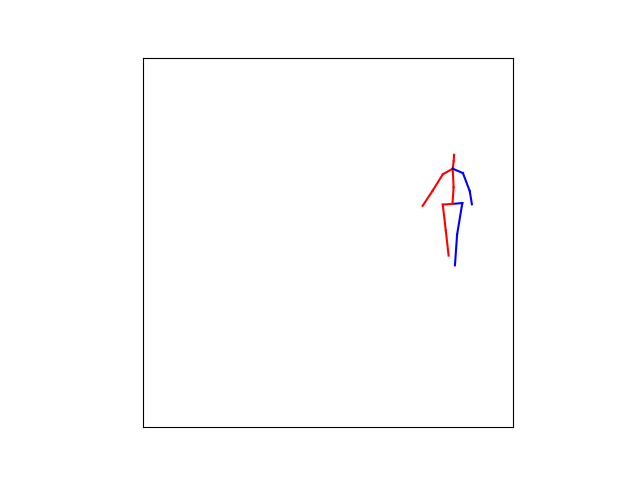

In [ ]:
frame_num = 200

configs = {
    'ax_2d': {'type': '2d', 'loc': 111, 'W': W, 'H': H},
}
fig, axs = generate_axes(0, configs, fig_title='')
plot_pose_setting = [
    ('ax_2d', img_2d, {'color': '', 'label': '2d', }),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num)
axs['ax_2d'].axes.xaxis.set_ticklabels([])
axs['ax_2d'].axes.xaxis.set_ticks([])
axs['ax_2d'].axes.set_xlabel('')
axs['ax_2d'].axes.yaxis.set_ticklabels([])
axs['ax_2d'].axes.yaxis.set_ticks([])
axs['ax_2d'].axes.set_ylabel('')
axs['ax_2d'].legend().remove()
axs['ax_2d'].set_title('')
plt.show()
plt.savefig(f'custom_codes/figures/fig1a_origianal_2d_{subject}_{action}_{cam_id}.svg', bbox_inches='tight', pad_inches=0.1, dpi=300)

### fig. 1 (b) normalized 2D

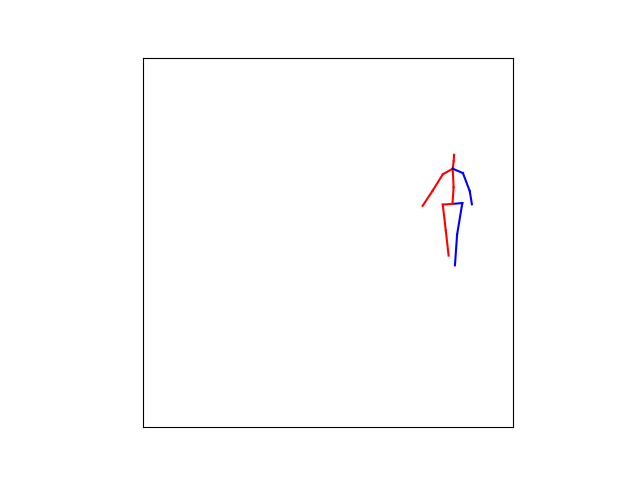

In [ ]:
frame_num = 200

configs = {
    'ax_2d': {'type': '2d', 'loc': 111, 'normalize': True},
}
fig, axs = generate_axes(1, configs, fig_title='')
plot_pose_setting = [
    ('ax_2d', img_2d_norm, {'color': '', 'label': '2d'}),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num)
axs['ax_2d'].axes.xaxis.set_ticklabels([])
axs['ax_2d'].axes.xaxis.set_ticks([])
axs['ax_2d'].axes.set_xlabel('')
axs['ax_2d'].axes.yaxis.set_ticklabels([])
axs['ax_2d'].axes.yaxis.set_ticks([])
axs['ax_2d'].axes.set_ylabel('')
axs['ax_2d'].legend().remove()
axs['ax_2d'].set_title('')
plt.show()
plt.savefig(f'custom_codes/figures/fig1b_norm_2d_{subject}_{action}_{cam_id}.svg', bbox_inches='tight', pad_inches=0.1, dpi=300)

# fig. 2

### fig. 2 (c) centered 2D

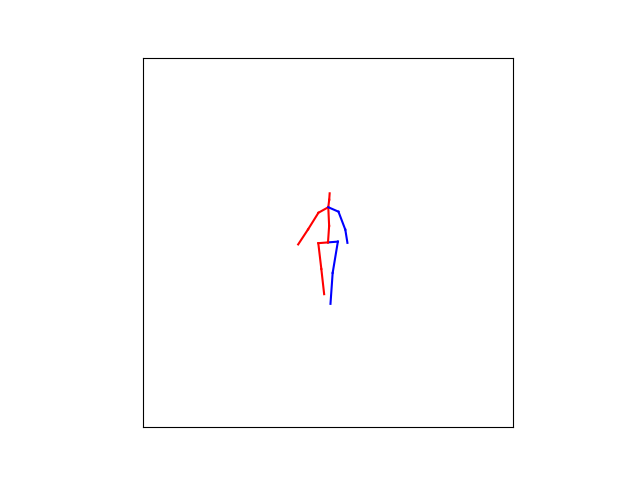

In [ ]:
frame_num = 200

configs = {
    'ax_2d': {'type': '2d', 'loc': 111, 'normalize': True},
}
fig, axs = generate_axes(2, configs, fig_title='')
plot_pose_setting = [
    ('ax_2d', img_2d_centered, {'color': '', 'label': '2d'}),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num)
axs['ax_2d'].axes.xaxis.set_ticklabels([])
axs['ax_2d'].axes.xaxis.set_ticks([])
axs['ax_2d'].axes.set_xlabel('')
axs['ax_2d'].axes.yaxis.set_ticklabels([])
axs['ax_2d'].axes.yaxis.set_ticks([])
axs['ax_2d'].axes.set_ylabel('')
axs['ax_2d'].legend().remove()
axs['ax_2d'].set_title('')
plt.show()
plt.savefig(f'custom_codes/figures/fig1c_centered_2d_{subject}_{action}_{cam_id}.svg', bbox_inches='tight', pad_inches=0.1, dpi=300)

### fig. 2 (d) canonical 2D

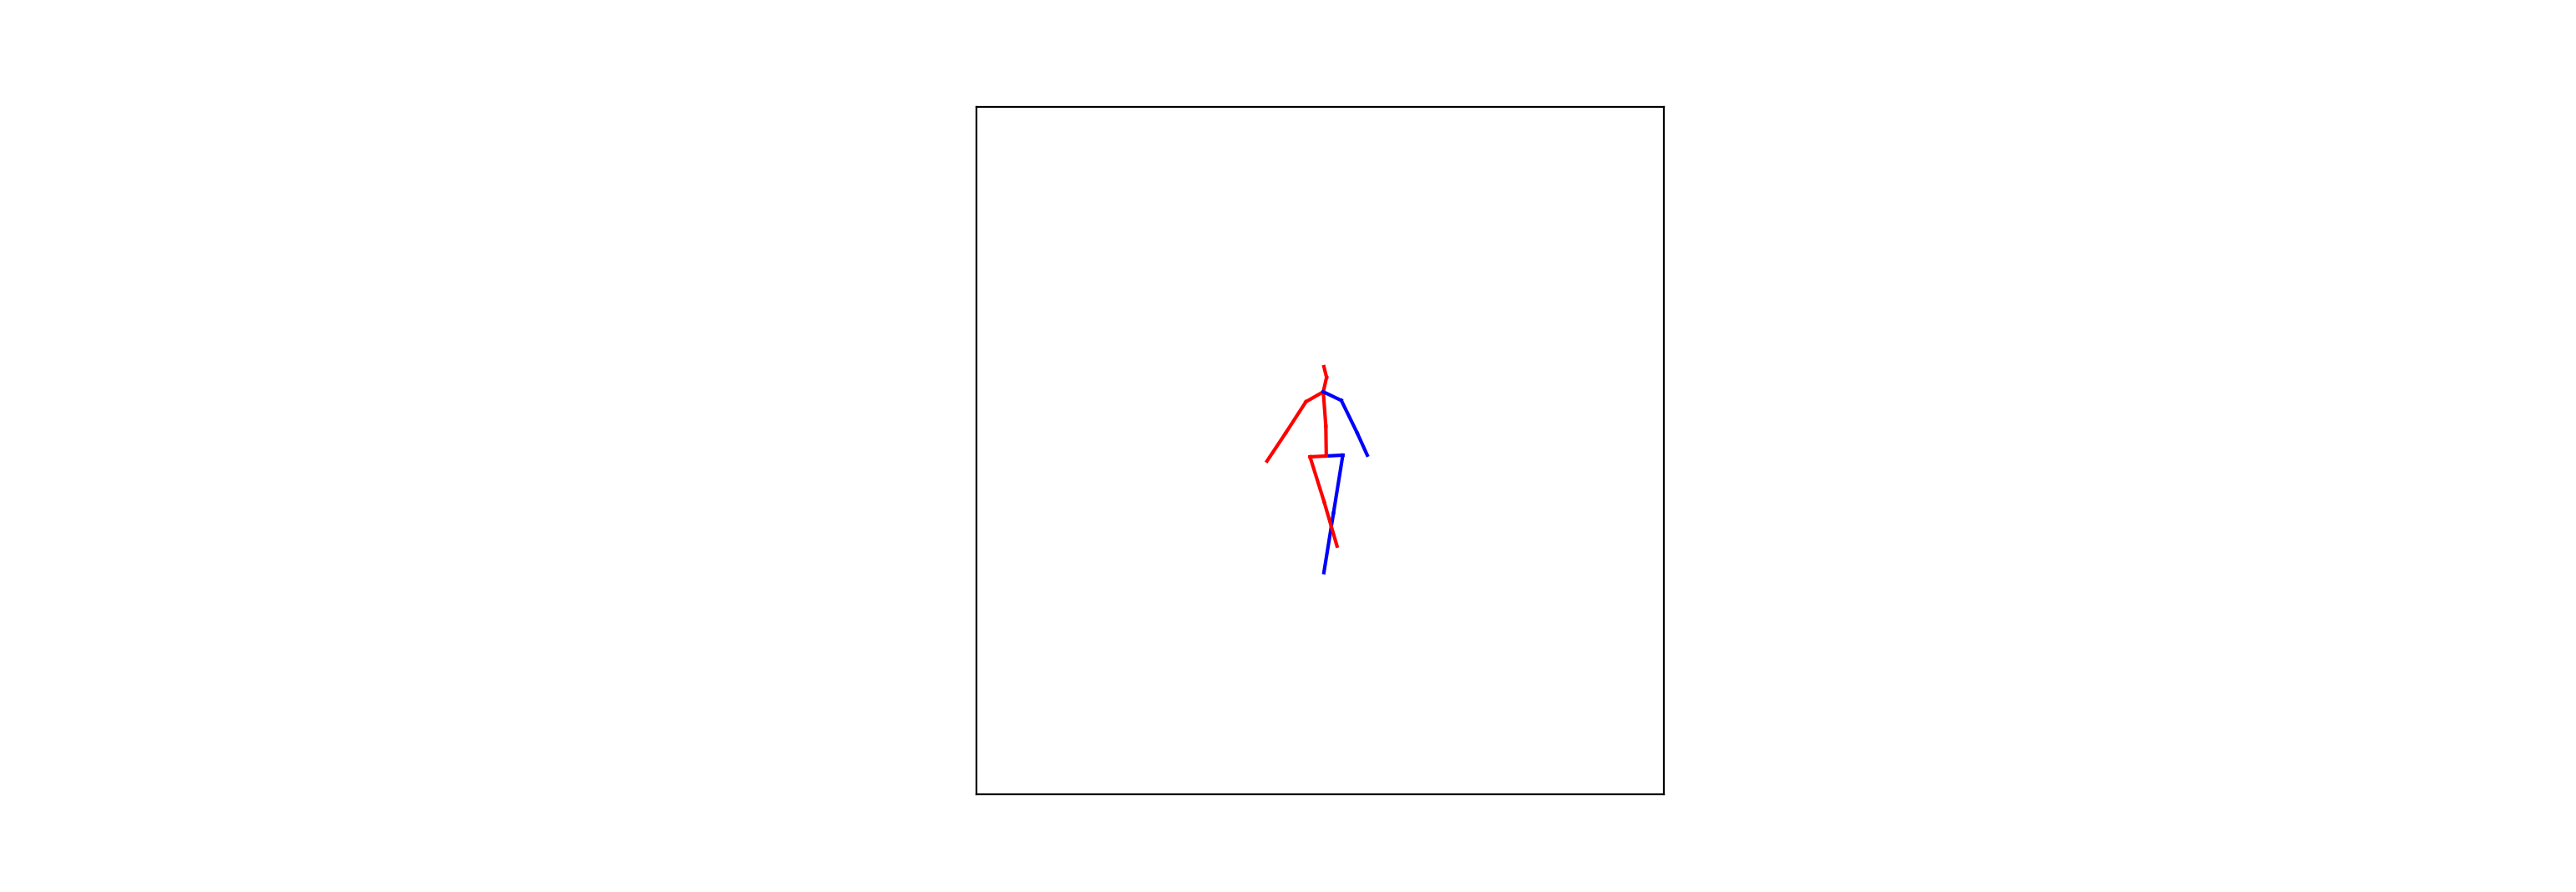

In [ ]:
frame_num = 200

configs = {
    'ax_2d': {'type': '2d', 'loc': 111, 'normalize': True},
}
fig, axs = generate_axes(3, configs, fig_title='')
plot_pose_setting = [
    ('ax_2d', img_2d_canonical_norm, {'color': '', 'label': '2d'}),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num)
axs['ax_2d'].axes.xaxis.set_ticklabels([])
axs['ax_2d'].axes.xaxis.set_ticks([])
axs['ax_2d'].axes.set_xlabel('')
axs['ax_2d'].axes.yaxis.set_ticklabels([])
axs['ax_2d'].axes.yaxis.set_ticks([])
axs['ax_2d'].axes.set_ylabel('')
axs['ax_2d'].legend().remove()
axs['ax_2d'].set_title('')
plt.show()
plt.savefig(f'custom_codes/figures/fig1d_canonical_2d_{subject}_{action}_{cam_id}.svg', bbox_inches='tight', pad_inches=0.1, dpi=300)

### fig. 2 (a)

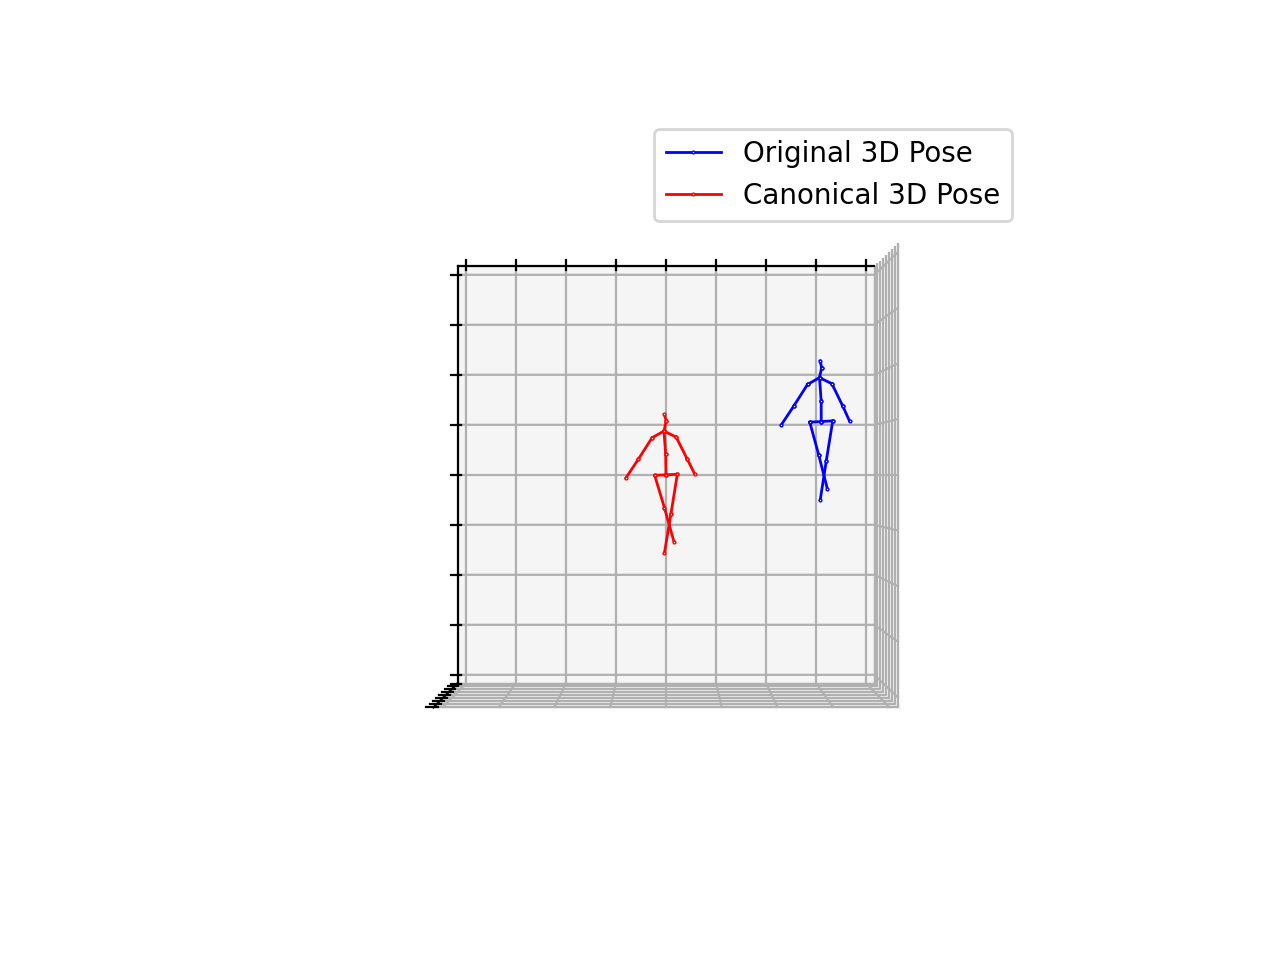

In [8]:
frame_num = 200

configs = {
    'ax_3d': {'type': '3d', 'loc': 111, 'mode': 'cam'},
}
fig, axs = generate_axes(7, configs, fig_title='')
plot_pose_setting = [
    ('ax_3d', cam_3d, {'color': 'b', 'label': 'Original 3D Pose'}),
    ('ax_3d', cam_3d_canonical, {'color': 'r', 'label': 'Canonical 3D Pose'}),
]

general_plot_func(axs, configs, plot_pose_setting, frame_num, legend_fontsize=10)
axs['ax_3d'].axes.xaxis.set_ticklabels([])
axs['ax_3d'].axes.yaxis.set_ticklabels([])
axs['ax_3d'].axes.zaxis.set_ticklabels([])
axs['ax_3d'].axes.set_xlabel('')
axs['ax_3d'].axes.set_ylabel('')
axs['ax_3d'].axes.set_zlabel('')
#axs['ax_3d'].legend().remove()
axs['ax_3d'].set_title('')

plt.show()
plt.savefig(f'custom_codes/figures/fig2a_cam_3d_{subject}_{action}_{cam_id}.svg', bbox_inches='tight', pad_inches=0.1, dpi=300)

# fig. 3

### fig. 3 3D pose in camera frame

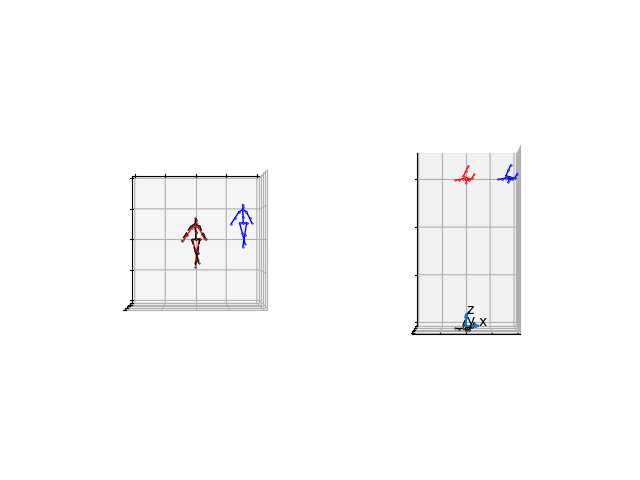

In [4]:
frame_num = 200

configs = {
    'ax_3d': {'type': '3d', 'loc': 121, 'mode': 'cam'},
    'ax_3d_top': {'type': '3d', 'loc': 122, 'mode': 'cam_top', 'zlim': [0, cam_3d[frame_num][0][2]+1]},
}
fig, axs = generate_axes(4, configs, fig_title='')
plot_pose_setting = [
    ('ax_3d', cam_3d, {'color': 'b', 'label': 'Original 3D Pose'}),
    ('ax_3d_top', cam_3d, {'color': 'b', 'label': 'Original 3D Pose'}),
    ('ax_3d', cam_3d_canonical, {'color': 'r', 'label': 'Canonical 3D Pose'}),
    ('ax_3d_top', cam_3d_canonical, {'color': 'r', 'label': 'Canonical 3D Pose'}),
    ('ax_3d', cam_3d_hat, {'color': 'k', 'linestyle': '--', 'label': 'Root-relative 3D Pose'}),
    ('ax_3d_top', cam_3d_hat, {'color': 'k', 'linestyle': '--', 'label': 'Root-relative 3D Pose'}),
]

general_plot_func(axs, configs, plot_pose_setting, frame_num, legend_fontsize=10)
axs['ax_3d'].axes.xaxis.set_ticklabels([])
axs['ax_3d'].axes.yaxis.set_ticklabels([])
axs['ax_3d'].axes.zaxis.set_ticklabels([])
axs['ax_3d'].axes.set_xlabel('')
axs['ax_3d'].axes.set_ylabel('')
axs['ax_3d'].axes.set_zlabel('')
axs['ax_3d'].legend().remove()
axs['ax_3d'].set_title('')
axs['ax_3d_top'].axes.xaxis.set_ticklabels([])
axs['ax_3d_top'].axes.yaxis.set_ticklabels([])
axs['ax_3d_top'].axes.zaxis.set_ticklabels([])
axs['ax_3d_top'].axes.set_xlabel('')
axs['ax_3d_top'].axes.set_ylabel('')
axs['ax_3d_top'].axes.set_zlabel('')
axs['ax_3d_top'].legend().remove()
axs['ax_3d_top'].set_title('')

camera = Camera(origin=np.array([0, 0, 0]),
                calib_mat=intrinsic,
                cam_default_R=np.eye(3),
                IMAGE_HEIGHT=H,
                IMAGE_WIDTH=W,
                cam_name='cam_frame')
plt.sca(axs['ax_3d_top'])
camera.cam_frame.draw3d(show_name=False)
plt.show()
plt.savefig(f'custom_codes/figures/fig3_cam_3d_{subject}_{action}_{cam_id}.svg', bbox_inches='tight', pad_inches=0.1, dpi=300)

# fig. 4

### fig. 4 (a) - global position domain gap

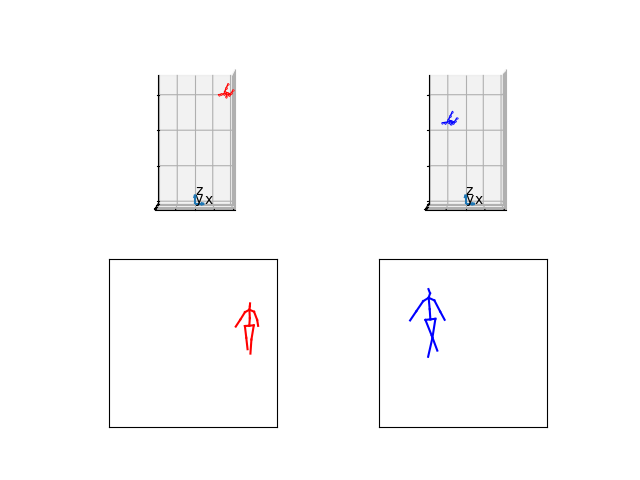

In [4]:
frame_num = 200

cam_pose1 = cam_3d.copy()
img_pose1 = projection(cam_pose1, intrinsic)
img_pose1_norm = normalize_input(img_pose1, W, H)

cam_pose2 = cam_3d.copy() + np.array([-2.5, 0, -1.5]) #- cam_3d[:, 0:1] + np.array([-1, 0, 5])
img_pose2 = projection(cam_pose2, intrinsic)
img_pose2_norm = normalize_input(img_pose2, W, H)

configs = {
    #'ax_3d': {'type': '3d', 'loc': 131, 'mode': 'cam'},
    'ax_3d_top_pose1': {'type': '3d', 'loc': 221, 'mode': 'cam_top', 'zlim': [0, cam_3d[frame_num][0][2]+1]},
    'ax_3d_top_pose2': {'type': '3d', 'loc': 222, 'mode': 'cam_top', 'zlim': [0, cam_3d[frame_num][0][2]+1]},
    'ax_2d_pose1': {'type': '2d', 'loc': 223, 'normalize': True},
    'ax_2d_pose2': {'type': '2d', 'loc': 224, 'normalize': True},
}
fig, axs = generate_axes(5, configs, fig_title='')
plot_pose_setting = [
    ('ax_3d_top_pose1', cam_pose1, {'color': 'r', 'label': '3d'}),
    ('ax_3d_top_pose2', cam_pose2, {'color': 'b', 'label': '3d'}),
    ('ax_2d_pose1', img_pose1_norm, {'color': 'r', 'label': f'pelvis at ({cam_pose1[frame_num][0][0]:.1f}, {cam_pose1[frame_num][0][1]:.1f}, {cam_pose1[frame_num][0][2]:.1f})'}),
    ('ax_2d_pose2', img_pose2_norm, {'color': 'b', 'label': f'pelvis at ({cam_pose2[frame_num][0][0]:.1f}, {cam_pose2[frame_num][0][1]:.1f}, {cam_pose2[frame_num][0][2]:.1f})'}),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num, legend_fontsize=10, legend_loc='upper left', legend_bbox_to_anchor=(0, 0))

axs['ax_3d_top_pose1'].axes.xaxis.set_ticklabels([])
axs['ax_3d_top_pose1'].axes.yaxis.set_ticklabels([])
axs['ax_3d_top_pose1'].axes.zaxis.set_ticklabels([])
axs['ax_3d_top_pose1'].axes.set_xlabel('')
axs['ax_3d_top_pose1'].axes.set_ylabel('')
axs['ax_3d_top_pose1'].axes.set_zlabel('')
axs['ax_3d_top_pose1'].legend().remove()
axs['ax_3d_top_pose1'].set_title('')

axs['ax_3d_top_pose2'].axes.xaxis.set_ticklabels([])
axs['ax_3d_top_pose2'].axes.yaxis.set_ticklabels([])
axs['ax_3d_top_pose2'].axes.zaxis.set_ticklabels([])
axs['ax_3d_top_pose2'].axes.set_xlabel('')
axs['ax_3d_top_pose2'].axes.set_ylabel('')
axs['ax_3d_top_pose2'].axes.set_zlabel('')
axs['ax_3d_top_pose2'].legend().remove()
axs['ax_3d_top_pose2'].set_title('')

axs['ax_2d_pose1'].axes.xaxis.set_ticklabels([])
axs['ax_2d_pose1'].axes.xaxis.set_ticks([])
axs['ax_2d_pose1'].axes.set_xlabel('')
axs['ax_2d_pose1'].axes.yaxis.set_ticklabels([])
axs['ax_2d_pose1'].axes.yaxis.set_ticks([])
axs['ax_2d_pose1'].axes.set_ylabel('')
axs['ax_2d_pose1'].legend().remove()
axs['ax_2d_pose1'].set_title('')

axs['ax_2d_pose2'].axes.xaxis.set_ticklabels([])
axs['ax_2d_pose2'].axes.xaxis.set_ticks([])
axs['ax_2d_pose2'].axes.set_xlabel('')
axs['ax_2d_pose2'].axes.yaxis.set_ticklabels([])
axs['ax_2d_pose2'].axes.yaxis.set_ticks([])
axs['ax_2d_pose2'].axes.set_ylabel('')
axs['ax_2d_pose2'].legend().remove()
axs['ax_2d_pose2'].set_title('')

camera = Camera(origin=np.array([0, 0, 0]),
                calib_mat=intrinsic,
                cam_default_R=np.eye(3),
                IMAGE_HEIGHT=H,
                IMAGE_WIDTH=W,
                cam_name='cam_frame')
plt.sca(axs['ax_3d_top_pose1'])
camera.cam_frame.draw3d(show_name=False)
plt.sca(axs['ax_3d_top_pose2'])
camera.cam_frame.draw3d(show_name=False)

plt.show()
plt.savefig(f'custom_codes/figures/fig4_gp_{subject}_{action}_{cam_id}.svg', bbox_inches='tight', pad_inches=0.1, dpi=300)

### fig. 4 (b) - local pose domain gap

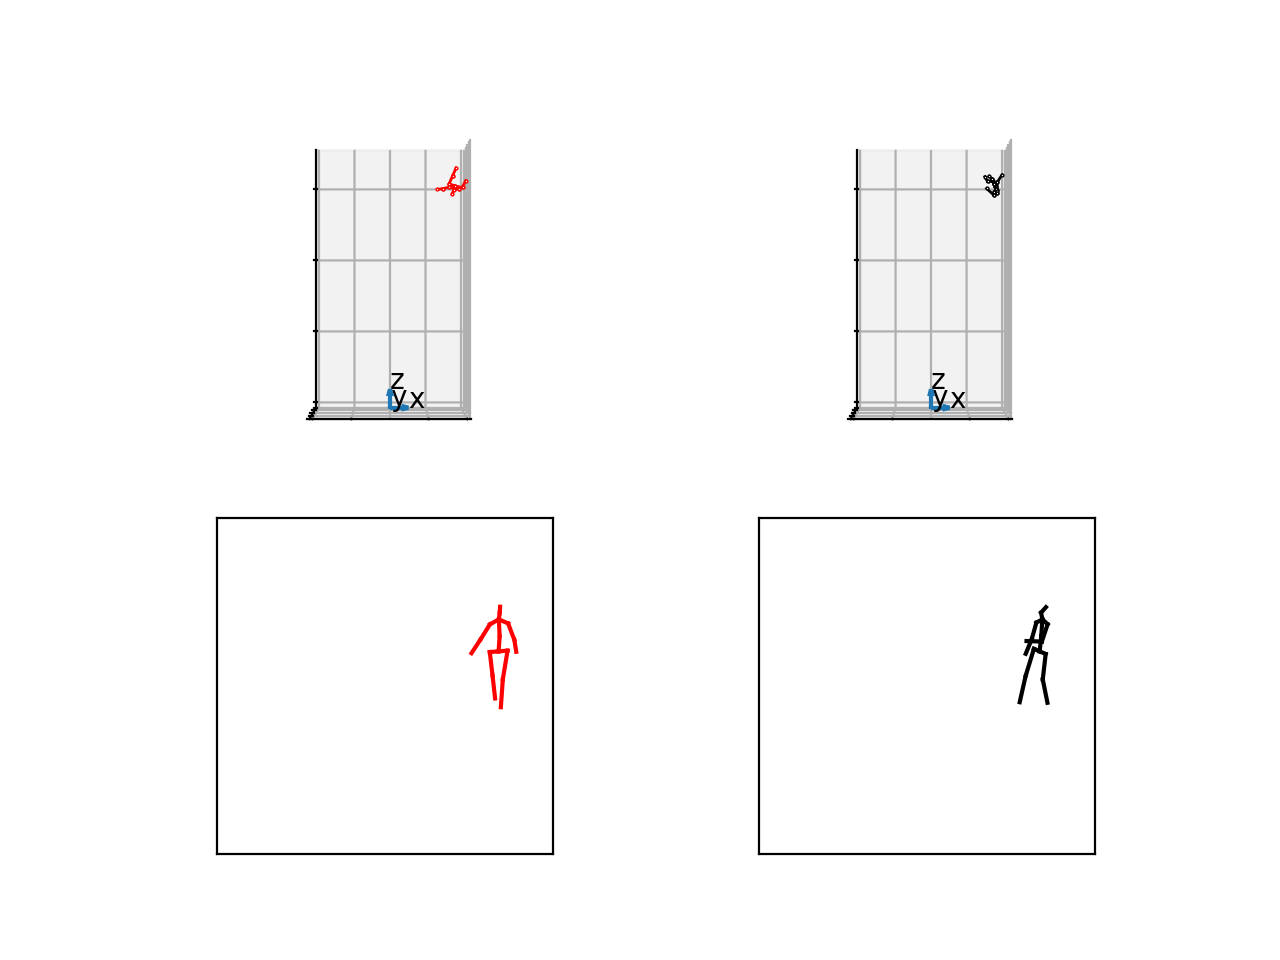

In [17]:
frame_num = 200

cam_pose1 = cam_3d.copy()
img_pose1 = projection(cam_pose1, intrinsic)
img_pose1_norm = normalize_input(img_pose1, W, H)

cam_pose2 = cam_3d.copy()
cam_pose2[frame_num] = cam_pose1[frame_num + 100].copy() - cam_pose1[frame_num + 100, 0:1] + cam_pose1[frame_num, 0:1]
img_pose2 = projection(cam_pose2, intrinsic)
img_pose2_norm = normalize_input(img_pose2, W, H)

configs = {
    #'ax_3d': {'type': '3d', 'loc': 131, 'mode': 'cam'},
    'ax_3d_top_pose1': {'type': '3d', 'loc': 221, 'mode': 'cam_top', 'zlim': [0, cam_3d[frame_num][0][2]+1]},
    'ax_3d_top_pose2': {'type': '3d', 'loc': 222, 'mode': 'cam_top', 'zlim': [0, cam_3d[frame_num][0][2]+1]},
    'ax_2d_pose1': {'type': '2d', 'loc': 223, 'normalize': True},
    'ax_2d_pose2': {'type': '2d', 'loc': 224, 'normalize': True},
}
fig, axs = generate_axes(6, configs, fig_title='')
plot_pose_setting = [
    ('ax_3d_top_pose1', cam_pose1, {'color': 'r', 'label': '3d'}),
    ('ax_3d_top_pose2', cam_pose2, {'color': 'k', 'label': '3d'}),
    ('ax_2d_pose1', img_pose1_norm, {'color': 'r', 'label': f'pelvis at ({cam_pose1[frame_num][0][0]:.1f}, {cam_pose1[frame_num][0][1]:.1f}, {cam_pose1[frame_num][0][2]:.1f})'}),
    ('ax_2d_pose2', img_pose2_norm, {'color': 'k', 'label': f'pelvis at ({cam_pose2[frame_num][0][0]:.1f}, {cam_pose2[frame_num][0][1]:.1f}, {cam_pose2[frame_num][0][2]:.1f})'}),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num, legend_fontsize=10, legend_loc='upper left', legend_bbox_to_anchor=(0, 0))

axs['ax_3d_top_pose1'].axes.xaxis.set_ticklabels([])
axs['ax_3d_top_pose1'].axes.yaxis.set_ticklabels([])
axs['ax_3d_top_pose1'].axes.zaxis.set_ticklabels([])
axs['ax_3d_top_pose1'].axes.set_xlabel('')
axs['ax_3d_top_pose1'].axes.set_ylabel('')
axs['ax_3d_top_pose1'].axes.set_zlabel('')
axs['ax_3d_top_pose1'].legend().remove()
axs['ax_3d_top_pose1'].set_title('')

axs['ax_3d_top_pose2'].axes.xaxis.set_ticklabels([])
axs['ax_3d_top_pose2'].axes.yaxis.set_ticklabels([])
axs['ax_3d_top_pose2'].axes.zaxis.set_ticklabels([])
axs['ax_3d_top_pose2'].axes.set_xlabel('')
axs['ax_3d_top_pose2'].axes.set_ylabel('')
axs['ax_3d_top_pose2'].axes.set_zlabel('')
axs['ax_3d_top_pose2'].legend().remove()
axs['ax_3d_top_pose2'].set_title('')

axs['ax_2d_pose1'].axes.xaxis.set_ticklabels([])
axs['ax_2d_pose1'].axes.xaxis.set_ticks([])
axs['ax_2d_pose1'].axes.set_xlabel('')
axs['ax_2d_pose1'].axes.yaxis.set_ticklabels([])
axs['ax_2d_pose1'].axes.yaxis.set_ticks([])
axs['ax_2d_pose1'].axes.set_ylabel('')
axs['ax_2d_pose1'].legend().remove()
axs['ax_2d_pose1'].set_title('')

axs['ax_2d_pose2'].axes.xaxis.set_ticklabels([])
axs['ax_2d_pose2'].axes.xaxis.set_ticks([])
axs['ax_2d_pose2'].axes.set_xlabel('')
axs['ax_2d_pose2'].axes.yaxis.set_ticklabels([])
axs['ax_2d_pose2'].axes.yaxis.set_ticks([])
axs['ax_2d_pose2'].axes.set_ylabel('')
axs['ax_2d_pose2'].legend().remove()
axs['ax_2d_pose2'].set_title('')

camera = Camera(origin=np.array([0, 0, 0]),
                calib_mat=intrinsic,
                cam_default_R=np.eye(3),
                IMAGE_HEIGHT=H,
                IMAGE_WIDTH=W,
                cam_name='cam_frame')
plt.sca(axs['ax_3d_top_pose1'])
camera.cam_frame.draw3d(show_name=False)
plt.sca(axs['ax_3d_top_pose2'])
camera.cam_frame.draw3d(show_name=False)

plt.show()
plt.savefig(f'custom_codes/figures/fig4_lp_{subject}_{action}_{cam_id}.svg', bbox_inches='tight', pad_inches=0.1, dpi=300)

### fig. 4 (c) - canonical 2D-3D example

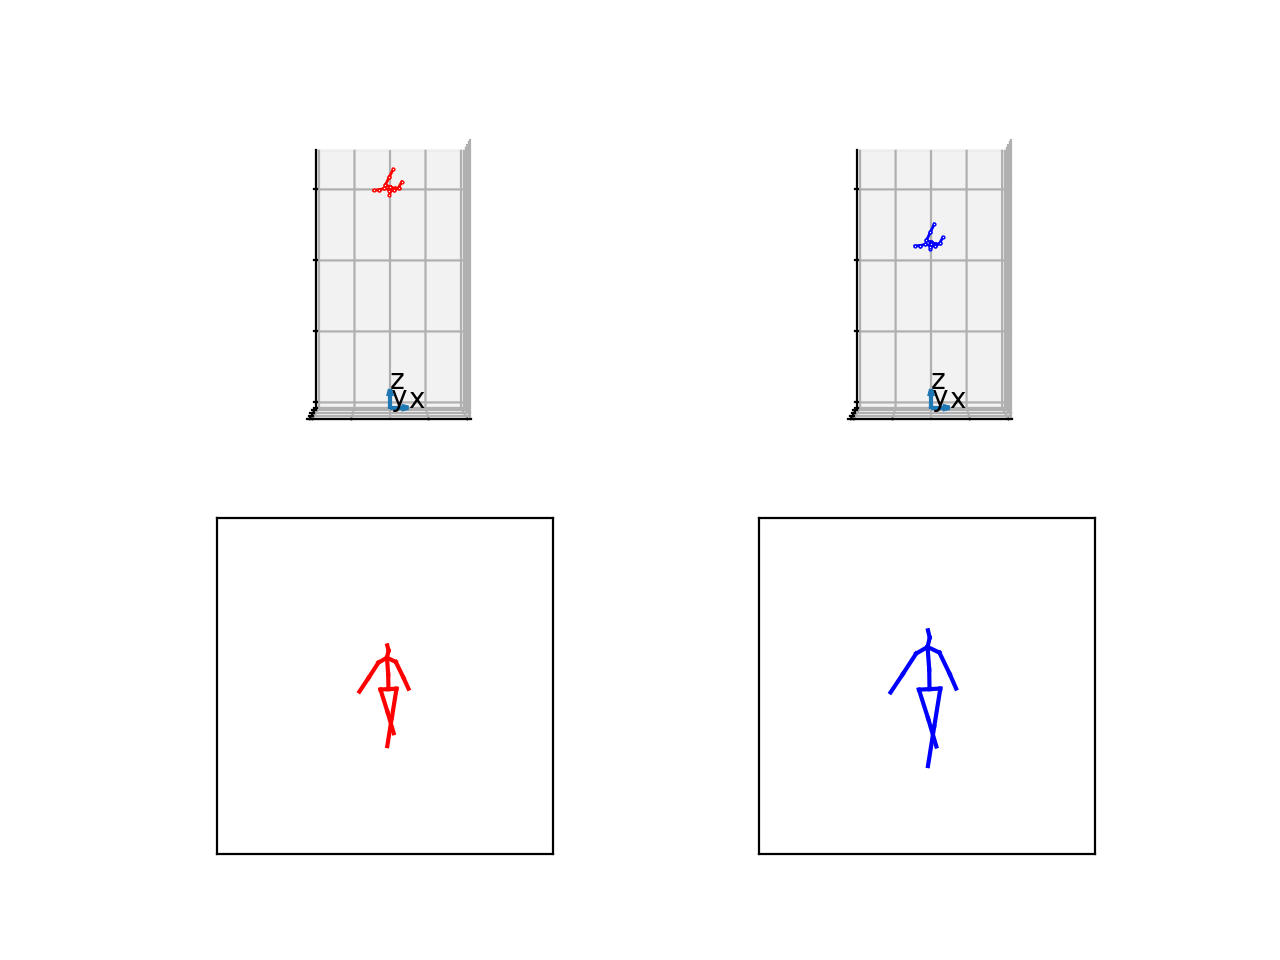

In [ ]:
frame_num = 200

cam_pose1 = cam_3d_canonical.copy()
img_pose1 = projection(cam_pose1, intrinsic)
img_pose1_norm = normalize_input(img_pose1, W, H)

cam_pose2 = cam_3d.copy() + np.array([-2.5, 0, -1.5]) #- cam_3d[:, 0:1] + np.array([-1, 0, 5])
cam_pose2[:, :, :2] -= cam_pose2[:, 0:1, :2]
img_pose2 = projection(cam_pose2, intrinsic)
img_pose2_norm = normalize_input(img_pose2, W, H)

configs = {
    #'ax_3d': {'type': '3d', 'loc': 131, 'mode': 'cam'},
    'ax_3d_top_pose1': {'type': '3d', 'loc': 221, 'mode': 'cam_top', 'zlim': [0, cam_3d[frame_num][0][2]+1]},
    'ax_3d_top_pose2': {'type': '3d', 'loc': 222, 'mode': 'cam_top', 'zlim': [0, cam_3d[frame_num][0][2]+1]},
    'ax_2d_pose1': {'type': '2d', 'loc': 223, 'normalize': True},
    'ax_2d_pose2': {'type': '2d', 'loc': 224, 'normalize': True},
}
fig, axs = generate_axes(7, configs, fig_title='')
plot_pose_setting = [
    ('ax_3d_top_pose1', cam_pose1, {'color': 'r', 'label': '3d'}),
    ('ax_3d_top_pose2', cam_pose2, {'color': 'b', 'label': '3d'}),
    ('ax_2d_pose1', img_pose1_norm, {'color': 'r', 'label': f'pelvis at ({cam_pose1[frame_num][0][0]:.1f}, {cam_pose1[frame_num][0][1]:.1f}, {cam_pose1[frame_num][0][2]:.1f})'}),
    ('ax_2d_pose2', img_pose2_norm, {'color': 'b', 'label': f'pelvis at ({cam_pose2[frame_num][0][0]:.1f}, {cam_pose2[frame_num][0][1]:.1f}, {cam_pose2[frame_num][0][2]:.1f})'}),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num, legend_fontsize=10, legend_loc='upper left', legend_bbox_to_anchor=(0, 0))

axs['ax_3d_top_pose1'].axes.xaxis.set_ticklabels([])
axs['ax_3d_top_pose1'].axes.yaxis.set_ticklabels([])
axs['ax_3d_top_pose1'].axes.zaxis.set_ticklabels([])
axs['ax_3d_top_pose1'].axes.set_xlabel('')
axs['ax_3d_top_pose1'].axes.set_ylabel('')
axs['ax_3d_top_pose1'].axes.set_zlabel('')
axs['ax_3d_top_pose1'].legend().remove()
axs['ax_3d_top_pose1'].set_title('')

axs['ax_3d_top_pose2'].axes.xaxis.set_ticklabels([])
axs['ax_3d_top_pose2'].axes.yaxis.set_ticklabels([])
axs['ax_3d_top_pose2'].axes.zaxis.set_ticklabels([])
axs['ax_3d_top_pose2'].axes.set_xlabel('')
axs['ax_3d_top_pose2'].axes.set_ylabel('')
axs['ax_3d_top_pose2'].axes.set_zlabel('')
axs['ax_3d_top_pose2'].legend().remove()
axs['ax_3d_top_pose2'].set_title('')

axs['ax_2d_pose1'].axes.xaxis.set_ticklabels([])
axs['ax_2d_pose1'].axes.xaxis.set_ticks([])
axs['ax_2d_pose1'].axes.set_xlabel('')
axs['ax_2d_pose1'].axes.yaxis.set_ticklabels([])
axs['ax_2d_pose1'].axes.yaxis.set_ticks([])
axs['ax_2d_pose1'].axes.set_ylabel('')
axs['ax_2d_pose1'].legend().remove()
axs['ax_2d_pose1'].set_title('')

axs['ax_2d_pose2'].axes.xaxis.set_ticklabels([])
axs['ax_2d_pose2'].axes.xaxis.set_ticks([])
axs['ax_2d_pose2'].axes.set_xlabel('')
axs['ax_2d_pose2'].axes.yaxis.set_ticklabels([])
axs['ax_2d_pose2'].axes.yaxis.set_ticks([])
axs['ax_2d_pose2'].axes.set_ylabel('')
axs['ax_2d_pose2'].legend().remove()
axs['ax_2d_pose2'].set_title('')

camera = Camera(origin=np.array([0, 0, 0]),
                calib_mat=intrinsic,
                cam_default_R=np.eye(3),
                IMAGE_HEIGHT=H,
                IMAGE_WIDTH=W,
                cam_name='cam_frame')
plt.sca(axs['ax_3d_top_pose1'])
camera.cam_frame.draw3d(show_name=False)
plt.sca(axs['ax_3d_top_pose2'])
camera.cam_frame.draw3d(show_name=False)

plt.show()
plt.savefig(f'custom_codes/figures/fig4_gp_canonical.svg', bbox_inches='tight', pad_inches=0.1, dpi=300)

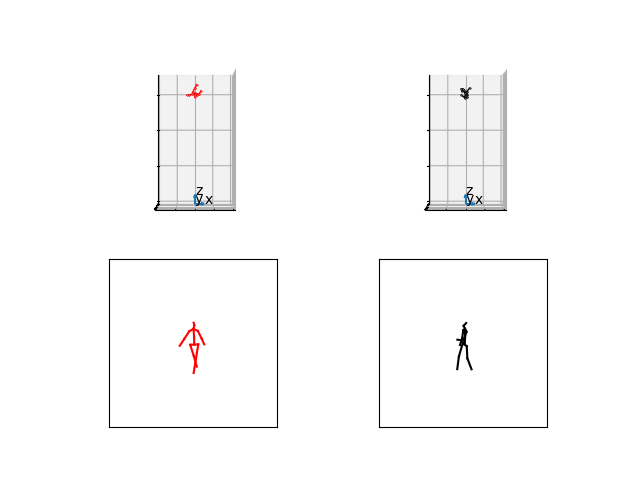

In [15]:
frame_num = 200

cam_pose1 = cam_3d_canonical.copy()
img_pose1 = projection(cam_pose1, intrinsic)
img_pose1_norm = normalize_input(img_pose1, W, H)

cam_pose2 = cam_3d.copy()
cam_pose2[frame_num] = cam_pose1[frame_num + 100].copy() - cam_pose1[frame_num + 100, 0:1] + cam_pose1[frame_num, 0:1]
cam_pose2[:, :, :2] -= cam_pose2[:, 0:1, :2]
img_pose2 = projection(cam_pose2, intrinsic)
img_pose2_norm = normalize_input(img_pose2, W, H)

configs = {
    #'ax_3d': {'type': '3d', 'loc': 131, 'mode': 'cam'},
    'ax_3d_top_pose1': {'type': '3d', 'loc': 221, 'mode': 'cam_top', 'zlim': [0, cam_3d[frame_num][0][2]+1]},
    'ax_3d_top_pose2': {'type': '3d', 'loc': 222, 'mode': 'cam_top', 'zlim': [0, cam_3d[frame_num][0][2]+1]},
    'ax_2d_pose1': {'type': '2d', 'loc': 223, 'normalize': True},
    'ax_2d_pose2': {'type': '2d', 'loc': 224, 'normalize': True},
}
fig, axs = generate_axes(8, configs, fig_title='')
plot_pose_setting = [
    ('ax_3d_top_pose1', cam_pose1, {'color': 'r', 'label': '3d'}),
    ('ax_3d_top_pose2', cam_pose2, {'color': 'k', 'label': '3d'}),
    ('ax_2d_pose1', img_pose1_norm, {'color': 'r', 'label': f'pelvis at ({cam_pose1[frame_num][0][0]:.1f}, {cam_pose1[frame_num][0][1]:.1f}, {cam_pose1[frame_num][0][2]:.1f})'}),
    ('ax_2d_pose2', img_pose2_norm, {'color': 'k', 'label': f'pelvis at ({cam_pose2[frame_num][0][0]:.1f}, {cam_pose2[frame_num][0][1]:.1f}, {cam_pose2[frame_num][0][2]:.1f})'}),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num, legend_fontsize=10, legend_loc='upper left', legend_bbox_to_anchor=(0, 0))

axs['ax_3d_top_pose1'].axes.xaxis.set_ticklabels([])
axs['ax_3d_top_pose1'].axes.yaxis.set_ticklabels([])
axs['ax_3d_top_pose1'].axes.zaxis.set_ticklabels([])
axs['ax_3d_top_pose1'].axes.set_xlabel('')
axs['ax_3d_top_pose1'].axes.set_ylabel('')
axs['ax_3d_top_pose1'].axes.set_zlabel('')
axs['ax_3d_top_pose1'].legend().remove()
axs['ax_3d_top_pose1'].set_title('')

axs['ax_3d_top_pose2'].axes.xaxis.set_ticklabels([])
axs['ax_3d_top_pose2'].axes.yaxis.set_ticklabels([])
axs['ax_3d_top_pose2'].axes.zaxis.set_ticklabels([])
axs['ax_3d_top_pose2'].axes.set_xlabel('')
axs['ax_3d_top_pose2'].axes.set_ylabel('')
axs['ax_3d_top_pose2'].axes.set_zlabel('')
axs['ax_3d_top_pose2'].legend().remove()
axs['ax_3d_top_pose2'].set_title('')

axs['ax_2d_pose1'].axes.xaxis.set_ticklabels([])
axs['ax_2d_pose1'].axes.xaxis.set_ticks([])
axs['ax_2d_pose1'].axes.set_xlabel('')
axs['ax_2d_pose1'].axes.yaxis.set_ticklabels([])
axs['ax_2d_pose1'].axes.yaxis.set_ticks([])
axs['ax_2d_pose1'].axes.set_ylabel('')
axs['ax_2d_pose1'].legend().remove()
axs['ax_2d_pose1'].set_title('')

axs['ax_2d_pose2'].axes.xaxis.set_ticklabels([])
axs['ax_2d_pose2'].axes.xaxis.set_ticks([])
axs['ax_2d_pose2'].axes.set_xlabel('')
axs['ax_2d_pose2'].axes.yaxis.set_ticklabels([])
axs['ax_2d_pose2'].axes.yaxis.set_ticks([])
axs['ax_2d_pose2'].axes.set_ylabel('')
axs['ax_2d_pose2'].legend().remove()
axs['ax_2d_pose2'].set_title('')

camera = Camera(origin=np.array([0, 0, 0]),
                calib_mat=intrinsic,
                cam_default_R=np.eye(3),
                IMAGE_HEIGHT=H,
                IMAGE_WIDTH=W,
                cam_name='cam_frame')
plt.sca(axs['ax_3d_top_pose1'])
camera.cam_frame.draw3d(show_name=False)
plt.sca(axs['ax_3d_top_pose2'])
camera.cam_frame.draw3d(show_name=False)

plt.show()
plt.savefig(f'custom_codes/figures/fig4_lp_canonical.svg', bbox_inches='tight', pad_inches=0.1, dpi=300)

# output distribution: original vs root-relative

In [6]:
pelvis_idx = get_h36m_keypoint_index('Pelvis')
r_wrist_idx = get_h36m_keypoint_index('R_Wrist')
l_wrist_idx = get_h36m_keypoint_index('L_Wrist')
r_ankle_idx = get_h36m_keypoint_index('R_Ankle')
l_ankle_idx = get_h36m_keypoint_index('L_Ankle')
pelvis_idx, r_wrist_idx, l_wrist_idx, r_ankle_idx, l_ankle_idx

(0, 16, 13, 3, 6)

  0%|          | 0/836 [00:00<?, ?it/s]

100%|██████████| 836/836 [00:22<00:00, 37.78it/s]


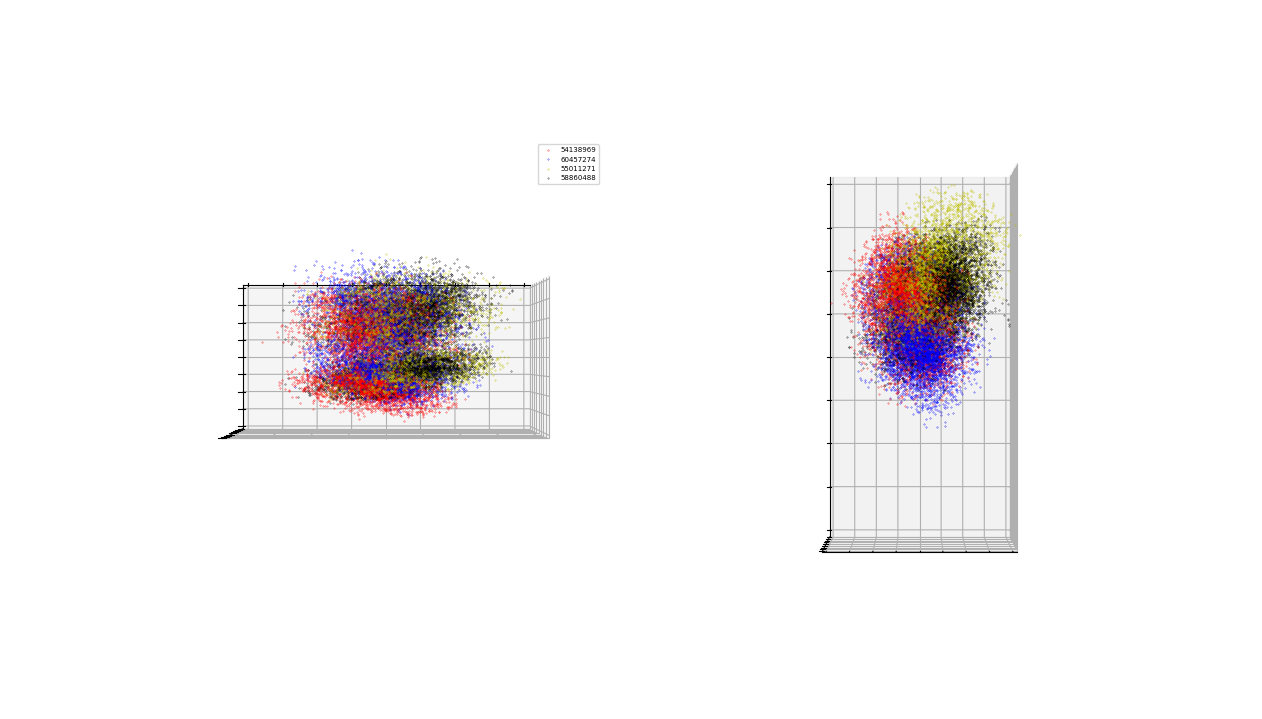

In [7]:
configs = {
    'ax_3d': {'type': '3d', 'loc': 121, 'mode': 'cam', 'ylim': [-1, 1]},
    'ax_3d_top': {'type': '3d', 'loc': 122, 'mode': 'cam_top', 'zlim': [0, 8]},
}
fig, axs = generate_axes(9, configs, fig_title='')

stride = 300
for source in tqdm(data['source_list']):
    subject, cam_id, action = split_source_name(source, dataset_name)
    if cam_id == '54138969': marker_style = 'r.'
    elif cam_id == '60457274': marker_style = 'b.'
    elif cam_id == '55011271': marker_style = 'y.'
    else: marker_style = 'k.'
    cam_3d = data['cam_3d'][subject][action][cam_id].copy()
    num_frames = cam_3d.shape[0]
    for frame_num in range(0, num_frames, stride):
        pose3d = cam_3d[frame_num]
        pelvis = pose3d[pelvis_idx]
        r_wrist = pose3d[r_wrist_idx]
        l_wrist = pose3d[l_wrist_idx]
        r_ankle = pose3d[r_ankle_idx]
        l_ankle = pose3d[l_ankle_idx]
        # axs['ax_3d'].plot(pelvis[0], pelvis[1], pelvis[2], marker_style, markersize=0.5, label=cam_id)
        axs['ax_3d'].plot(r_wrist[0], r_wrist[1], r_wrist[2], marker_style, markersize=0.5, label=cam_id)
        axs['ax_3d'].plot(l_wrist[0], l_wrist[1], l_wrist[2], marker_style, markersize=0.5)
        axs['ax_3d'].plot(r_ankle[0], r_ankle[1], r_ankle[2], marker_style, markersize=0.5)
        axs['ax_3d'].plot(l_ankle[0], l_ankle[1], l_ankle[2], marker_style, markersize=0.5)
        #axs['ax_3d_top'].plot(pelvis[0], pelvis[1], pelvis[2], marker_style, markersize=0.5, label=cam_id)
        axs['ax_3d_top'].plot(r_wrist[0], r_wrist[1], r_wrist[2], marker_style, markersize=0.5, label=cam_id)
        axs['ax_3d_top'].plot(l_wrist[0], l_wrist[1], l_wrist[2], marker_style, markersize=0.5)
        axs['ax_3d_top'].plot(r_ankle[0], r_ankle[1], r_ankle[2], marker_style, markersize=0.5)
        axs['ax_3d_top'].plot(l_ankle[0], l_ankle[1], l_ankle[2], marker_style, markersize=0.5)
    #break
    
axs['ax_3d'].axes.xaxis.set_ticklabels([])
axs['ax_3d'].axes.yaxis.set_ticklabels([])
axs['ax_3d'].axes.zaxis.set_ticklabels([])
axs['ax_3d'].axes.set_xlabel('')
axs['ax_3d'].axes.set_ylabel('')
axs['ax_3d'].axes.set_zlabel('')
#axs['ax_3d'].legend().remove()
axs['ax_3d'].set_title('')

axs['ax_3d_top'].axes.xaxis.set_ticklabels([])
axs['ax_3d_top'].axes.yaxis.set_ticklabels([])
axs['ax_3d_top'].axes.zaxis.set_ticklabels([])
axs['ax_3d_top'].axes.set_xlabel('')
axs['ax_3d_top'].axes.set_ylabel('')
axs['ax_3d_top'].axes.set_zlabel('')
#axs['ax_3d_top'].legend().remove()
axs['ax_3d_top'].set_title('')

legend_without_duplicate_labels(axs['ax_3d'])
plt.show()

In [ ]:
plt.savefig(f'custom_codes/figures/fig_h36m_output_dist_original.svg', bbox_inches='tight', pad_inches=0.1, dpi=300)

In [35]:
stride = 1
total_frame = 0
total_pose = []
for source in tqdm(data['source_list']):
    subject, cam_id, action = split_source_name(source, dataset_name)
    if subject in ['S9', 'S11']: continue
    cam_3d = data['cam_3d'][subject][action][cam_id].copy()
    total_pose.append(cam_3d)

total_pose = np.concatenate(total_pose, axis=0)
total_pose.shape, total_pose.mean(axis=0), total_pose.std(axis=0), total_pose.std(axis=0).mean()

100%|██████████| 836/836 [00:00<00:00, 12620.03it/s]


((1559752, 17, 3),
 array([[ 0.09512063, -0.39747931,  5.14757798],
        [ 0.09486497, -0.40459892,  5.14659654],
        [ 0.089466  , -0.0778433 ,  5.2195109 ],
        [ 0.08495004,  0.29366858,  5.30293096],
        [ 0.09537628, -0.39035977,  5.1485594 ],
        [ 0.09002333, -0.0704389 ,  5.21980379],
        [ 0.08512406,  0.31079807,  5.30559439],
        [ 0.09802646, -0.60884262,  5.10015689],
        [ 0.100796  , -0.83256822,  5.04988058],
        [ 0.10105948, -0.88937128,  5.03691136],
        [ 0.10249415, -0.98142793,  5.01640658],
        [ 0.10053983, -0.78141101,  5.06076344],
        [ 0.09808027, -0.5850468 ,  5.10412428],
        [ 0.09638648, -0.51764989,  5.11932537],
        [ 0.09979249, -0.7811234 ,  5.0620654 ],
        [ 0.09679711, -0.59448649,  5.10444114],
        [ 0.0959912 , -0.56614388,  5.11018773]]),
 array([[0.48487735, 0.2906919 , 0.7511238 ],
        [0.52798553, 0.29616651, 0.78819291],
        [0.54033959, 0.21604568, 0.80717527],
        

In [36]:
stride = 1
total_frame = 0
total_pose = []
for source in tqdm(data['source_list']):
    subject, cam_id, action = split_source_name(source, dataset_name)
    if subject in ['S9', 'S11']: continue
    cam_3d = data['cam_3d'][subject][action][cam_id].copy()
    cam_3d_hat = cam_3d.copy() - cam_3d[:, 0:1]
    total_pose.append(cam_3d_hat)

total_pose = np.concatenate(total_pose, axis=0)
total_pose.shape, total_pose.mean(axis=0), total_pose.std(axis=0), total_pose.std(axis=0).mean()

 44%|████▍     | 372/836 [00:00<00:00, 1882.20it/s]

100%|██████████| 836/836 [00:00<00:00, 2037.71it/s]


((1559752, 17, 3),
 array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-2.55652586e-04, -7.11960595e-03, -9.81433109e-04],
        [-5.65463051e-03,  3.19636009e-01,  7.19329269e-02],
        [-1.01705840e-02,  6.91147891e-01,  1.55352986e-01],
        [ 2.55651318e-04,  7.11954583e-03,  9.81423814e-04],
        [-5.09729779e-03,  3.27040413e-01,  7.22258094e-02],
        [-9.99656606e-03,  7.08277383e-01,  1.58016408e-01],
        [ 2.90583676e-03, -2.11363307e-01, -4.74210916e-02],
        [ 5.67537804e-03, -4.35088906e-01, -9.76974016e-02],
        [ 5.93884964e-03, -4.91891970e-01, -1.10666618e-01],
        [ 7.37352084e-03, -5.83948619e-01, -1.31171400e-01],
        [ 5.41920653e-03, -3.83931702e-01, -8.68145417e-02],
        [ 2.95964663e-03, -1.87567488e-01, -4.34536935e-02],
        [ 1.26585822e-03, -1.20170579e-01, -2.82526050e-02],
        [ 4.67186639e-03, -3.83644090e-01, -8.55125784e-02],
        [ 1.67648572e-03, -1.97007177e-01, -4.31368364e-02],
     

In [30]:
stride = 1
total_frame = 0
total_pose = []
for source in tqdm(data['source_list']):
    subject, cam_id, action = split_source_name(source, dataset_name)
    if subject in ['S9', 'S11']: continue
    img_2d = data['img_2d'][subject][action][cam_id].copy()
    total_pose.append(img_2d)

total_pose = np.concatenate(total_pose, axis=0)
total_pose.shape, total_pose.mean(axis=0), total_pose.std(axis=0), total_pose.std(axis=0).mean()

100%|██████████| 836/836 [00:00<00:00, 23345.75it/s]


((1559752, 17, 2),
 array([[532.20320191, 419.4061123 ],
        [531.94502474, 417.87784414],
        [530.79384776, 493.53163208],
        [529.46532756, 576.31488475],
        [532.40930324, 420.98278182],
        [532.01607002, 494.71911229],
        [529.78812265, 579.2870012 ],
        [533.0960895 , 369.87829893],
        [534.33389232, 316.31319915],
        [534.80801337, 302.35197337],
        [535.15213378, 279.8976308 ],
        [534.32125651, 328.78219546],
        [533.70076445, 375.55105942],
        [533.65599642, 391.07341156],
        [533.73871983, 328.65976974],
        [532.70078165, 373.2817501 ],
        [532.93040674, 379.70614189]]),
 array([[108.59338591,  63.65416424],
        [120.11867487,  64.45708069],
        [119.99637275,  50.71326378],
        [121.60259573,  56.83772639],
        [102.64024395,  63.16528531],
        [106.81880032,  48.54335541],
        [109.19040221,  54.96955478],
        [110.14736491,  69.24048652],
        [112.60484076,  75.84

In [37]:
stride = 1
total_frame = 0
total_pose = []
for source in tqdm(data['source_list']):
    subject, cam_id, action = split_source_name(source, dataset_name)
    if subject in ['S9', 'S11']: continue
    cam_param = data['cam_param'][subject][action][cam_id].copy()
    W, H, intrinsic = cam_param['W'], cam_param['H'], cam_param['intrinsic']
    img_2d = data['img_2d'][subject][action][cam_id].copy()
    img_2d_norm = normalize_input(img_2d, W, H)
    total_pose.append(img_2d_norm)

total_pose = np.concatenate(total_pose, axis=0)
total_pose.shape, total_pose.mean(axis=0), total_pose.std(axis=0), total_pose.std(axis=0).mean()

100%|██████████| 836/836 [00:00<00:00, 1970.63it/s]


((1559752, 17, 2),
 array([[ 0.06441951, -0.16204541],
        [ 0.06390617, -0.16509891],
        [ 0.06160933, -0.01395413],
        [ 0.05895998,  0.15143738],
        [ 0.06482948, -0.15889524],
        [ 0.06404699, -0.01158099],
        [ 0.05960198,  0.15737562],
        [ 0.06620007, -0.26099534],
        [ 0.06866916, -0.36801129],
        [ 0.06961522, -0.39590418],
        [ 0.07030172, -0.44076459],
        [ 0.06864273, -0.34309979],
        [ 0.06740461, -0.24966203],
        [ 0.06731633, -0.21865108],
        [ 0.06748366, -0.34334467],
        [ 0.06541545, -0.25419651],
        [ 0.06587241, -0.24136192]]),
 array([[0.21699385, 0.12700905],
        [0.24002406, 0.12861551],
        [0.23978439, 0.10097868],
        [0.24298667, 0.11310037],
        [0.20509193, 0.12603041],
        [0.21342769, 0.09663517],
        [0.21817761, 0.10935224],
        [0.22009645, 0.13823046],
        [0.22500171, 0.15146562],
        [0.22604224, 0.15768907],
        [0.2296228 , 0.1624

  1%|▏         | 12/836 [00:00<00:07, 106.06it/s]

100%|██████████| 836/836 [00:21<00:00, 38.24it/s]


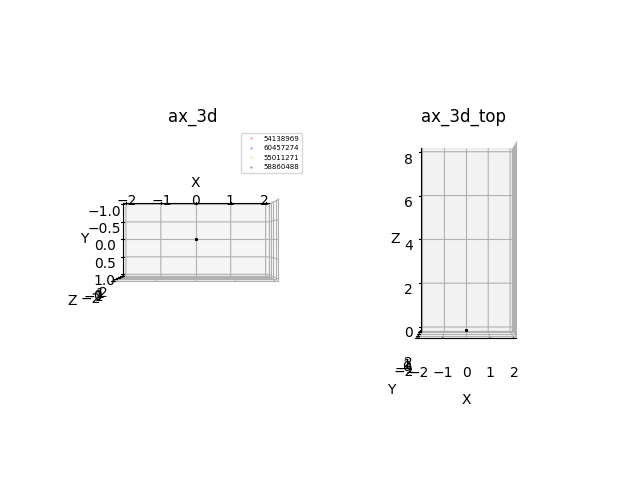

In [ ]:
configs = {
    'ax_3d': {'type': '3d', 'loc': 121, 'mode': 'cam', 'ylim': [-1, 1]},
    'ax_3d_top': {'type': '3d', 'loc': 122, 'mode': 'cam_top', 'zlim': [0, 8]},
}
fig, axs = generate_axes(11, configs, fig_title='')

stride = 300
for source in tqdm(data['source_list']):
    subject, cam_id, action = split_source_name(source, dataset_name)
    if cam_id == '54138969': marker_style = 'r.'
    elif cam_id == '60457274': marker_style = 'b.'
    elif cam_id == '55011271': marker_style = 'y.'
    else: marker_style = 'k.'
    cam_3d = data['cam_3d'][subject][action][cam_id].copy()
    cam_3d_hat = cam_3d.copy() - cam_3d[:, 0:1]
    num_frames = cam_3d.shape[0]
    for frame_num in range(0, num_frames, stride):
        pose3d = cam_3d_hat[frame_num]
        pelvis, r_ankle, l_ankle, r_wrist, l_wrist = pose3d[pelvis_idx], pose3d[r_ankle_idx], pose3d[l_ankle_idx], pose3d[r_wrist_idx], pose3d[l_wrist_idx]
        #axs['ax_3d'].plot(pelvis[0], pelvis[1], pelvis[2], marker_style, markersize=0.5, label=cam_id)
        axs['ax_3d'].plot(r_ankle[0], r_ankle[1], r_ankle[2], marker_style, markersize=0.5, label=cam_id)
        axs['ax_3d'].plot(l_ankle[0], l_ankle[1], l_ankle[2], marker_style, markersize=0.5)
        axs['ax_3d'].plot(r_wrist[0], r_wrist[1], r_wrist[2], marker_style, markersize=0.5)
        axs['ax_3d'].plot(l_wrist[0], l_wrist[1], l_wrist[2], marker_style, markersize=0.5)
        # axs['ax_3d_top'].plot(pelvis[0], pelvis[1], pelvis[2], marker_style, markersize=0.5, label=cam_id)
        axs['ax_3d_top'].plot(r_ankle[0], r_ankle[1], r_ankle[2], marker_style, markersize=0.5, label=cam_id)
        axs['ax_3d_top'].plot(l_ankle[0], l_ankle[1], l_ankle[2], marker_style, markersize=0.5)
        axs['ax_3d_top'].plot(r_wrist[0], r_wrist[1], r_wrist[2], marker_style, markersize=0.5)
        axs['ax_3d_top'].plot(l_wrist[0], l_wrist[1], l_wrist[2], marker_style, markersize=0.5)

    #break
    
axs['ax_3d'].axes.xaxis.set_ticklabels([])
axs['ax_3d'].axes.yaxis.set_ticklabels([])
axs['ax_3d'].axes.zaxis.set_ticklabels([])
axs['ax_3d'].axes.set_xlabel('')
axs['ax_3d'].axes.set_ylabel('')
axs['ax_3d'].axes.set_zlabel('')
#axs['ax_3d'].legend().remove()
axs['ax_3d'].set_title('')

axs['ax_3d_top'].axes.xaxis.set_ticklabels([])
axs['ax_3d_top'].axes.yaxis.set_ticklabels([])
axs['ax_3d_top'].axes.zaxis.set_ticklabels([])
axs['ax_3d_top'].axes.set_xlabel('')
axs['ax_3d_top'].axes.set_ylabel('')
axs['ax_3d_top'].axes.set_zlabel('')
#axs['ax_3d_top'].legend().remove()
axs['ax_3d_top'].set_title('')

legend_without_duplicate_labels(axs['ax_3d'])
plt.show()

In [ ]:
plt.savefig(f'custom_codes/figures/fig_h36m_output_dist_root-relative.svg', bbox_inches='tight', pad_inches=0.1, dpi=300)

# Input distribution: original vs canonical

In [3]:
pelvis_idx = get_h36m_keypoint_index('Pelvis')
r_wrist_idx = get_h36m_keypoint_index('R_Wrist')
l_wrist_idx = get_h36m_keypoint_index('L_Wrist')
r_ankle_idx = get_h36m_keypoint_index('R_Ankle')
l_ankle_idx = get_h36m_keypoint_index('L_Ankle')
pelvis_idx, r_wrist_idx, l_wrist_idx, r_ankle_idx, l_ankle_idx

(0, 16, 13, 3, 6)

In [ ]:
configs = {
    'ax_3d': {'type': '3d', 'loc': 121, 'mode': 'cam', 'ylim': [-1, 1]},
    'ax_3d_top': {'type': '3d', 'loc': 122, 'mode': 'cam_top', 'zlim': [0, 8]},
}
fig, axs = generate_axes(9, configs, fig_title='')

stride = 300
for source in tqdm(data['source_list']):
    subject, cam_id, action = split_source_name(source, dataset_name)
    if cam_id == '54138969': marker_style = 'r.'
    elif cam_id == '60457274': marker_style = 'b.'
    elif cam_id == '55011271': marker_style = 'y.'
    else: marker_style = 'k.'
    cam_3d = data['cam_3d'][subject][action][cam_id].copy()
    num_frames = cam_3d.shape[0]
    for frame_num in range(0, num_frames, stride):
        pose3d = cam_3d[frame_num]
        pelvis = pose3d[pelvis_idx]
        r_wrist = pose3d[r_wrist_idx]
        l_wrist = pose3d[l_wrist_idx]
        r_ankle = pose3d[r_ankle_idx]
        l_ankle = pose3d[l_ankle_idx]
        # axs['ax_3d'].plot(pelvis[0], pelvis[1], pelvis[2], marker_style, markersize=0.5, label=cam_id)
        axs['ax_3d'].plot(r_wrist[0], r_wrist[1], r_wrist[2], marker_style, markersize=0.5, label=cam_id)
        axs['ax_3d'].plot(l_wrist[0], l_wrist[1], l_wrist[2], marker_style, markersize=0.5)
        axs['ax_3d'].plot(r_ankle[0], r_ankle[1], r_ankle[2], marker_style, markersize=0.5)
        axs['ax_3d'].plot(l_ankle[0], l_ankle[1], l_ankle[2], marker_style, markersize=0.5)
        #axs['ax_3d_top'].plot(pelvis[0], pelvis[1], pelvis[2], marker_style, markersize=0.5, label=cam_id)
        axs['ax_3d_top'].plot(r_wrist[0], r_wrist[1], r_wrist[2], marker_style, markersize=0.5, label=cam_id)
        axs['ax_3d_top'].plot(l_wrist[0], l_wrist[1], l_wrist[2], marker_style, markersize=0.5)
        axs['ax_3d_top'].plot(r_ankle[0], r_ankle[1], r_ankle[2], marker_style, markersize=0.5)
        axs['ax_3d_top'].plot(l_ankle[0], l_ankle[1], l_ankle[2], marker_style, markersize=0.5)
    #break
    
axs['ax_3d'].axes.xaxis.set_ticklabels([])
axs['ax_3d'].axes.yaxis.set_ticklabels([])
axs['ax_3d'].axes.zaxis.set_ticklabels([])
axs['ax_3d'].axes.set_xlabel('')
axs['ax_3d'].axes.set_ylabel('')
axs['ax_3d'].axes.set_zlabel('')
#axs['ax_3d'].legend().remove()
axs['ax_3d'].set_title('')

axs['ax_3d_top'].axes.xaxis.set_ticklabels([])
axs['ax_3d_top'].axes.yaxis.set_ticklabels([])
axs['ax_3d_top'].axes.zaxis.set_ticklabels([])
axs['ax_3d_top'].axes.set_xlabel('')
axs['ax_3d_top'].axes.set_ylabel('')
axs['ax_3d_top'].axes.set_zlabel('')
#axs['ax_3d_top'].legend().remove()
axs['ax_3d_top'].set_title('')

legend_without_duplicate_labels(axs['ax_3d'])
plt.show()